In [1]:
import numpy as np
from enum import Enum
from typing import List
import random
import math
from utils import *

In [2]:
# Make all lists into numpy arrays for speed
# Add mean and std deviation functions for teams
# Get all opinions for a team

In [3]:
# OTHER DIST OPTION
# np.random.uniform
teamADist = Distribution(
    mean = -0.5,
    std_dev = 0.25,
    lower_bound = -1,
    upper_bound = 0,
    dist_func = np.random.normal
)

teamBDist = Distribution(
    mean = 0.5,
    std_dev = 0.25,
    lower_bound = 0,
    upper_bound = 1,
    dist_func = np.random.normal
)

teamA, teamB = generateAgents(teamADist, teamBDist, agentsPerTeam=100)

In [4]:
FRACTION_MOVE = 0.25
TOLERANCE = 0.75
history = sim(teamA, teamB, 25, FRACTION_MOVE, TOLERANCE)

Starting with iteration 0
Num Agents Team A: 100, Team B: 100
Starting with iteration 1
Num Agents Team A: 80, Team B: 77
Starting with iteration 2
Num Agents Team A: 70, Team B: 61
Starting with iteration 3
Num Agents Team A: 71, Team B: 65
Starting with iteration 4
Num Agents Team A: 90, Team B: 82
Opinions are the same! WOAH
Opinions are the same! WOAH
Starting with iteration 5
Num Agents Team A: 115, Team B: 108
Starting with iteration 6
Num Agents Team A: 139, Team B: 131
Opinions are the same! WOAH
Opinions are the same! WOAH
Starting with iteration 7
Num Agents Team A: 175, Team B: 171
Opinions are the same! WOAH
Opinions are the same! WOAH
Opinions are the same! WOAH
Opinions are the same! WOAH
Starting with iteration 8
Num Agents Team A: 212, Team B: 212
Starting with iteration 9
Num Agents Team A: 262, Team B: 262
Starting with iteration 10
Num Agents Team A: 341, Team B: 325
Opinions are the same! WOAH
Opinions are the same! WOAH
Starting with iteration 11
Num Agents Team A:

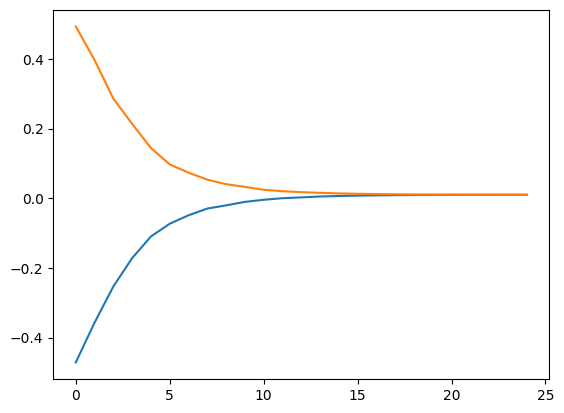

In [9]:
import matplotlib.pyplot as plt

teamAMeans = [teamA.get_mean_opinions() for teamA, _ in history]
teamBMeans = [teamB.get_mean_opinions() for  _, teamB in history]
plt.plot(teamAMeans, label="Team A")
plt.plot(teamBMeans, label="Team B")

In [ ]:
import matplotlib.pyplot as plt

teamAMeans = [teamA.get_std_dev_opinions() for teamA, _ in history]
teamBMeans = [teamB.get_std_dev_opinions() for  _, teamB in history]
plt.plot(teamAMeans, label="Team A")
plt.plot(teamBMeans, label="Team B")

In [8]:
plt.plot(teamAMeans)
plt.plot(teamBMeans)

NameError: name 'plt' is not defined

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
